In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
uterusFake = pd.read_csv('Desktop/Data_Adrienne/Skeletal Muscle Data/Muscle Recruit.txt', sep = '\t', header = None)
uterusFake.drop(columns = 3, axis = 0, inplace = True)
uterusFake.columns = ['Time (s)', 'Page', 'Transducer Output (mV)']
uterusFake.head()

,Time (s),Page,Transducer Output (mV)
0,0.00000,1,-0.01450
1,0.00005,1,-0.01400
2,0.00010,1,-0.01375
3,0.00015,1,-0.01400
4,0.00020,1,-0.01425


In [3]:
def adjustTime(df):
    df['Time (s)'] = df['Time (s)']*1000
    df.head()

In [4]:
def plotContractions(df, xmax, title = ""):
    '''.
    parameters
        df(pd.DataFrame) - Section of Lab
        title(str) - Section of Lab
    '''
    plt.figure(figsize = (10,6))
    plt.plot(df['Time (s)'], df['Transducer Output (mV)'], 'b-', linewidth=1)
    #plt.xticks(np.arange(0, np.round(df['Time (s)'].max())) + 1)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Transducer Output (mV)')
    plt.xlim(xmin = 0, xmax = xmax)
    plt.show()

In [5]:
adjustTime(uterusFake)

In [6]:
uterusFake

,Time (s),Page,Transducer Output (mV)
0,0.00,1,-0.01450
1,0.05,1,-0.01400
2,0.10,1,-0.01375
3,0.15,1,-0.01400
4,0.20,1,-0.01425
...,...,...,...
20475,127.75,8,-0.00825
20476,127.80,8,-0.00800
20477,127.85,8,-0.00850
20478,127.90,8,-0.00875


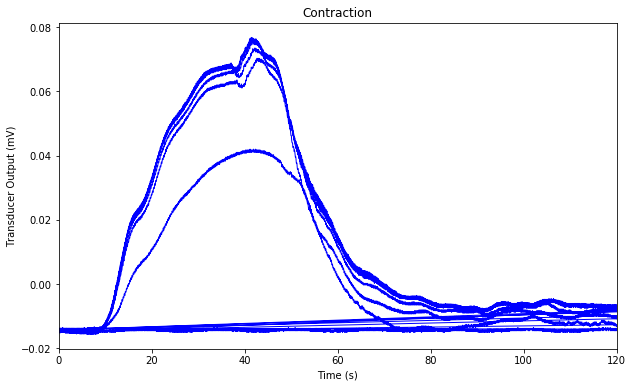

In [7]:
plotContractions(uterusFake, 120, "Contraction")

In [8]:
uterusFake['Page'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [9]:
pageOne = uterusFake[uterusFake['Page'] == 1]
pageEight = uterusFake[uterusFake['Page'] == 8]

In [10]:
pageOne['Time (s)']

0         0.00
1         0.05
2         0.10
3         0.15
4         0.20
         ...  
2555    127.75
2556    127.80
2557    127.85
2558    127.90
2559    127.95
Name: Time (s), Length: 2560, dtype: float64

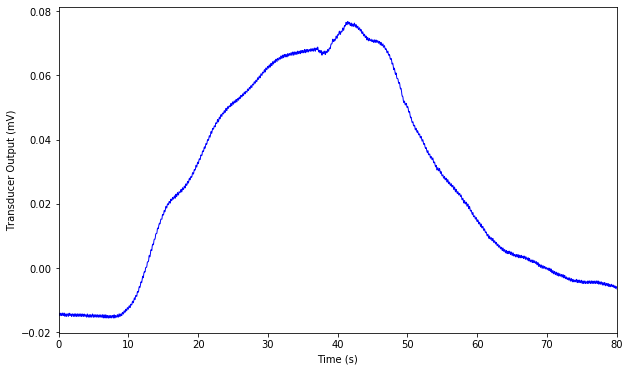

In [11]:
plotContractions(pageEight, 80)

In [12]:
pageEight.drop(columns = 'Page', inplace = True)

/Users/adrienneterrado/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
pageEight

,Time (s),Transducer Output (mV)
17920,0.00,-0.01425
17921,0.05,-0.01400
17922,0.10,-0.01425
17923,0.15,-0.01475
17924,0.20,-0.01475
...,...,...
20475,127.75,-0.00825
20476,127.80,-0.00800
20477,127.85,-0.00850
20478,127.90,-0.00875


In [14]:
#from 130 to some number by 0.05 until I get 2560 samples

In [15]:
addedTimesTwo = np.linspace(130, 255.95, num=2560)

addedTimesTwo

array([130.        , 130.04921844, 130.09843689, ..., 255.85156311,
       255.90078156, 255.95      ])

In [16]:
pageEightAdded = pageEight['Transducer Output (mV)']

In [17]:
len(pageEightAdded)

2560

In [18]:
EightDouble = {'Time (s)': addedTimesTwo, 
         'Transducer Output (mV)': pageEightAdded}
dfEightDouble = pd.DataFrame(data = EightDouble)
dfEightDouble

,Time (s),Transducer Output (mV)
17920,130.000000,-0.01425
17921,130.049218,-0.01400
17922,130.098437,-0.01425
17923,130.147655,-0.01475
17924,130.196874,-0.01475
...,...,...
20475,255.753126,-0.00825
20476,255.802345,-0.00800
20477,255.851563,-0.00850
20478,255.900782,-0.00875


In [19]:
secondContraction = pd.concat([pageEight, dfEightDouble])

In [20]:
secondContraction.describe()

,Time (s),Transducer Output (mV)
count,5120.000000,5120.000000
mean,128.475000,0.014296
std,74.198946,0.029430
min,0.000000,-0.015500
25%,63.987500,-0.007000
50%,128.975000,-0.004250
75%,192.962695,0.036562
max,255.950000,0.076750


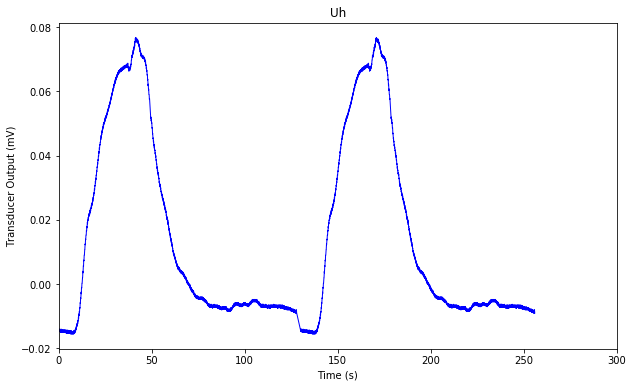

In [21]:
plotContractions(secondContraction, 300, "Uh")

In [22]:
secondContraction

,Time (s),Transducer Output (mV)
17920,0.000000,-0.01425
17921,0.050000,-0.01400
17922,0.100000,-0.01425
17923,0.150000,-0.01475
17924,0.200000,-0.01475
...,...,...
20475,255.753126,-0.00825
20476,255.802345,-0.00800
20477,255.851563,-0.00850
20478,255.900782,-0.00875


In [32]:
addedTimesThree = np.linspace(260, 385.95, num=2560)
addedTimesThree

array([260.        , 260.04921844, 260.09843689, ..., 385.85156311,
       385.90078156, 385.95      ])

In [33]:
EightTriple = {'Time (s)': addedTimesThree, 
         'Transducer Output (mV)': pageEightAdded}
dfEightTriple = pd.DataFrame(data = EightTriple)
dfEightTriple

,Time (s),Transducer Output (mV)
17920,260.000000,-0.01425
17921,260.049218,-0.01400
17922,260.098437,-0.01425
17923,260.147655,-0.01475
17924,260.196874,-0.01475
...,...,...
20475,385.753126,-0.00825
20476,385.802345,-0.00800
20477,385.851563,-0.00850
20478,385.900782,-0.00875


In [34]:
thirdContraction = pd.concat([secondContraction, dfEightTriple])

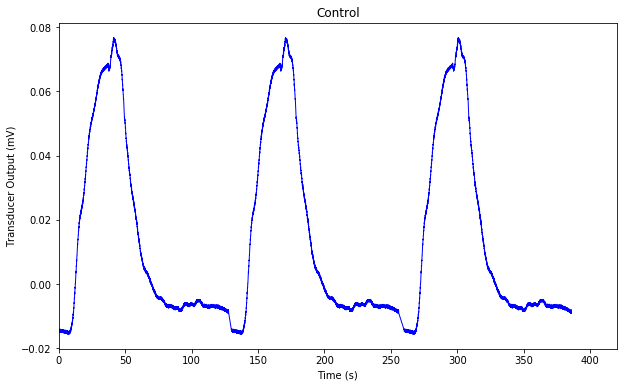

In [35]:
plotContractions(thirdContraction, 420, "Control")

In [27]:
thirdContraction

,Time (s),Transducer Output (mV)
17920,0.000000,-0.01425
17921,0.050000,-0.01400
17922,0.100000,-0.01425
17923,0.150000,-0.01475
17924,0.200000,-0.01475
...,...,...
20475,255.753126,-0.00825
20476,255.802345,-0.00800
20477,255.851563,-0.00850
20478,255.900782,-0.00875
